In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Exponential Smoothing

### Hyperparameters

In [2]:
df = pd.read_csv("../../results/tuning/exponential_smoothing.csv", sep=";")
metric = "RMSE"
assert check_normality(df[metric])
for hparam in ["LookBackWindowSize", "Method", "SeasonalPeriods"]:
    assert check_homoscedasticity(*[df[df[hparam]==val][metric] for val in df[hparam].unique()])

#### Look Back Window Size

Significant group difference: True
LookBackWindowSize
260     0.017962
520     0.017209
720     0.018605
1300    0.018903
Name: RMSE, dtype: float64


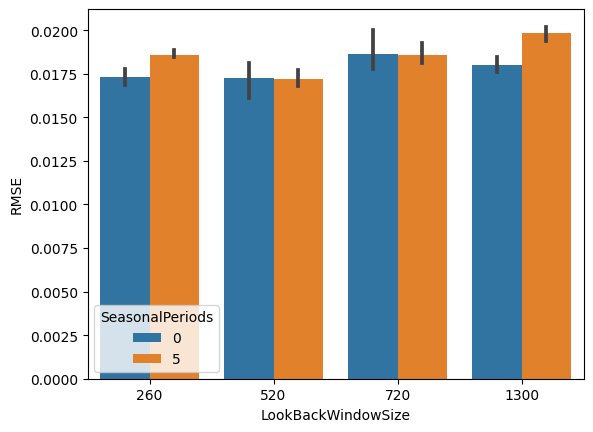

In [3]:
print("Significant group difference:", check_group_difference(df[df["LookBackWindowSize"]<=520][metric], df[df["LookBackWindowSize"]>520][metric]))
print(df.groupby("LookBackWindowSize")[metric].mean())
sns.barplot(x="LookBackWindowSize", y=metric, hue="SeasonalPeriods", data=df);

#### Method & Seasonality

Significant group difference (Method): False
Significant group difference (SeasonalPeriods): False
Method
L-BFGS-B    0.017889
Powell      0.017464
SLSQP       0.017404
Name: RMSE, dtype: float64


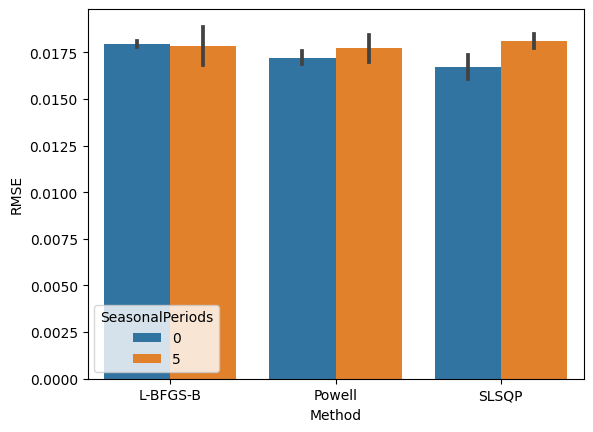

In [4]:
df = df[df["LookBackWindowSize"]<=520]
print("Significant group difference (Method):", check_group_difference(*[df[df["Method"]==val][metric] for val in df["Method"].unique()]))
print("Significant group difference (SeasonalPeriods):", check_group_difference(*[df[df["SeasonalPeriods"]==val][metric] for val in df["SeasonalPeriods"].unique()]))
print(df.groupby("Method")[metric].mean())
sns.barplot(x="Method", y=metric, hue="SeasonalPeriods", data=df);

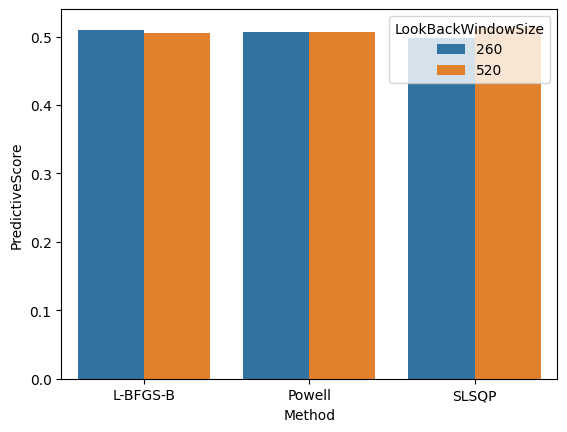

In [5]:
df = df[df["SeasonalPeriods"]==0]
sns.barplot(x="Method", y="PredictiveScore", hue="LookBackWindowSize", data=df);

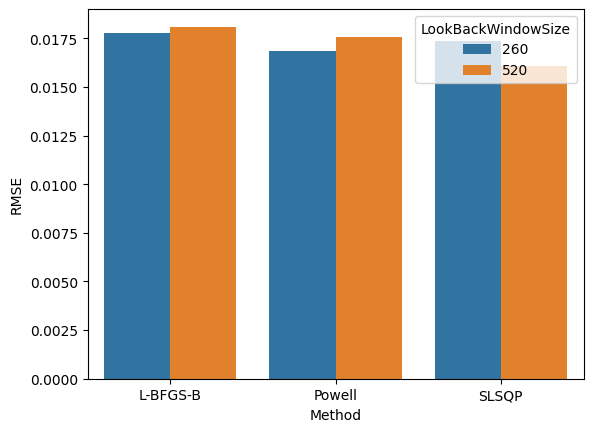

In [6]:
sns.barplot(x="Method", y="RMSE", hue="LookBackWindowSize", data=df);

### Conclusion
- Set 'look_back_window_size' to 260 (1 year) or 520 (2 years).
- The optimization method makes no significant difference; use 'L-BFGS-B' for 1 year and 'SLSQP' for 2 years.
- A Winters model with weekly seasonality does not improve performance, so stick to Simple Exponential Smoothing.